# Guided Practice.
 ----

  University: UTEC \\
  Course: Artificial Intelligence \\
  Professor: Cristian López Del Alamo \\
  Topic: Linear Regression \\

 ----
Participants (G8):
*   Adrian Sandoval Huamani
*   Jeffrey Antonio Monja Castro
*   Jeysson David Arévalo Mendoza



## NOTE: Make a copy of this Colab to work on your own computer.

1. In this practice, you are asked to conduct tests using different loss functions.

2. Your team should implement the machine learning algorithm for linear regression and perform the corresponding tests on the following [Dataset](https://drive.google.com/file/d/1W60C0Vkqx6qWhIZLADezokQugMwmfb22/view?usp=sharing).

3. You should select 70% of the Dataset for training and 30% for testing. Remember that both training and testing data must be taken randomly.

4. Use the following loss functions for comparisons. Additionally, remember that the derivatives will change each time you change the loss function.

   * MSE Loss Function \\

     $MSE = \frac{1}{2m}\sum_{i=0}^m (y_i - h(x_i))^2$ \\

   * MAE Loss Function \\

     $MAE = \frac{1}{m}\sum_{i=0}^m |y_i - h(x_i)|$ \\

   There are other loss functions in regression. Try, at home, with these other two functions.
   * Huber Loss Function \\

     \begin{align}
     L(y,h(x)) = \left\{ \begin{array}{cl}
     \frac{1}{2} \left[y-h(x)\right]^2 & \text{for }|y-h(x)| \le \delta, \\
     \delta \left(|y-h(x)|-\delta/2\right) & \text{otherwise.}
     \end{array}\right.
     \end{align} \\

   * Log Cosh Loss \\

     $LCE = \sum_{i=0}^m \log(\cosh(y_i - h(x_i)))$ \\


# Comparative Plot of Loss Functions.

Fuente: https://programmerclick.com/article/23511327338/

 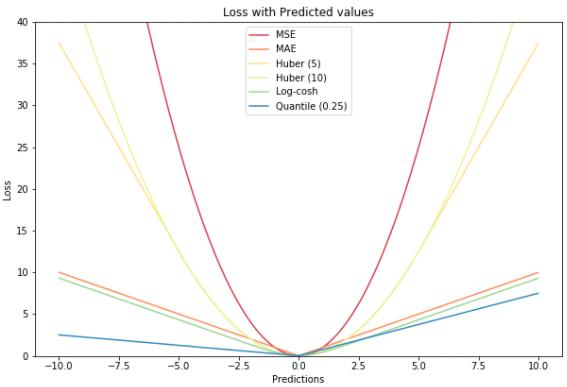

In [1]:
%pip install numpy
%pip install matplotlib
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


In [3]:
# From VsCode, they aren't needed
# from google.colab import drive
# drive.mount('/content/drive')

* **Read the database** and, if necessary, perform a cleaning step. This may involve removing columns with very few data points or rows with many missing values. In some cases, it may also be possible to interpolate data to fill in missing information.


* **Exploratory Data Analysis (EDA):** is a crucial step in data visualization and data analysis. It involves using various techniques to understand and summarize the main characteristics of a dataset before applying more complex statistical analyses or machine learning models.





       income  happiness
0    3.862647   2.314489
1    4.979381   3.433490
2    4.923957   4.599373
3    3.214372   2.791114
4    7.196409   5.596398
..        ...        ...
493  5.249209   4.568705
494  3.471799   2.535002
495  6.087610   4.397451
496  3.440847   2.070664
497  4.530545   3.710193

[498 rows x 2 columns]
[[3.86264742]
 [4.97938138]
 [4.92395694]
 [3.21437244]
 [7.19640925]
 [3.72964348]
 [4.67451739]
 [4.49810382]
 [3.12163053]
 [4.63991444]
 [4.63283951]
 [2.7731789 ]
 [7.11947859]
 [7.4666532 ]
 [2.11774233]
 [2.55916582]
 [2.35479322]
 [2.38815725]
 [4.75568027]
 [1.99427505]
 [7.31091603]
 [3.52831896]
 [2.42875167]
 [3.54274787]
 [5.22720124]
 [6.69199314]
 [3.90040994]
 [2.29105548]
 [2.38051271]
 [2.54960878]
 [6.93329583]
 [1.85564517]
 [3.58902314]
 [6.82647791]
 [2.07060188]
 [5.22420527]
 [2.24311363]
 [7.07616637]
 [4.1906725 ]
 [1.95648612]
 [5.06175818]
 [3.98218993]
 [3.06505862]
 [3.68287749]
 [3.78942929]
 [5.35871566]
 [5.19611978]
 [5.24118957]
 [7.

Text(0.5, 1.0, 'Gráfico de ingreso vs felicidad')

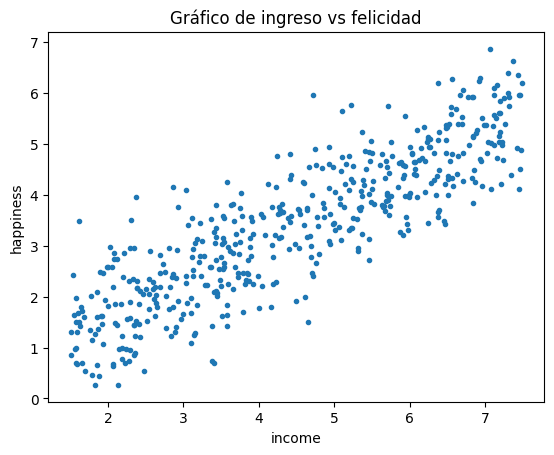

In [36]:
# Read the dataset
# dataset = pd.read_csv('/content/drive/MyDrive/UTEC/CURSOS/2022.2/Inteligencia Artificial/DataSet/Practica/db.csv')
dataset = pd.read_csv('./db.csv')
x = (dataset[['income']]).to_numpy()
y = (dataset[['happiness']]).to_numpy()

data = pd.DataFrame(dataset[['income','happiness']])
print(data)

print(x)

# Normalizing
# max - xi / max - min
# x = (np.max(x) - x) / (np.max(x) - np.min(x))
# y = (np.max(y) - y) / (np.max(y) - np.min(y))


# Exploratory Data Analysisa
plt.plot(x,y,'.')
plt.xlabel('income')
plt.ylabel('happiness')
plt.title('Gráfico de ingreso vs felicidad')

#Data Preparation

* Separate a portion of the data for training and another portion for validation/testing. In this case, 70/30.

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


# Modelo
$h(x_i) = x_i*w + b$

In [6]:
def h(x, w, b):
    """
    x: real value of x (income)
    w: slope 
    b: bias

    output: returns a vector of predictions of y for a given x
    """

    return w*x + b

# Loss function
$\mathcal{L} = \frac{1}{2n}\sum_{i=0}^n (y_i - h(x_i))^2$

In [7]:
def Error(x, y, w, b): 
    """
    x: real value of x (income)
    y: real value of y (happiness)
    w, b: from the model h(x) = w*x + b

    output: returns a escalar value of the error
    """ 
    n = len(x)

    return (1/(2*n) * np.sum((y - h(x, w, b))**2))



# Cálculo de derivadas
$db = \frac{1}{n}\sum_{i=0}^n(y_i - h(x_i))(-1)$

$dw = \frac{1}{n}\sum_{i=0}^n(y_i - h(x_i))(-x_i)$

In [8]:
def derivada(x, y, w, b):
    """
    x: real value of x (income)
    y: real value of y (happiness)
    w, b: from the model h(x) = w*x + b

    output: returns two numbers, the derivative of the error with respect to w and b
    """

    n = len(x)

    db = (1/n) * np.sum(((y) - h(x, w, b)) * (-1))
    dw = (1/n) * np.sum(((y) - h(x, w, b))* (-x))

    return db, dw


# Actualiación de parámetros

$h(x_i) = b + x_i*w $

$w  = w - \alpha*\frac{\partial L}{\partial w} $

$b  = b - \alpha*\frac{\partial L}{\partial b} $


In [9]:
def update(w, b, alfa, db, dw):
    """
    w, b: from the model h(x) = w*x + b
    alfa: learning rate
    db, dw: derivatives of the error with respect to w and b

    output: returns the updated w and b
    """

    w = w - alfa * dw
    b = b - alfa * db
    return b, w

# Training

In [14]:
def train(x, y, alfa, epochs):
    """
    x: x_train values (income)
    y: y_train values (happiness)
    alfa: learning rate
    epochs: number of iterations

    output: returns the final w, b and the loss vector 
    """

    np.random.seed(2001) # seed for reproducibility
    
    # random initialization of the parameters
    w = np.random.rand()
    b = np.random.rand() 
    L = Error(x, y, w, b) # initial loss

    print("First w: ", w, "First b: ", b, "First Loss: ", L)

    # store the loss values
    loss = []

    for i in range(epochs):
        db, dw = derivada(x, y, w, b) 
        b, w = update(w, b, alfa, db, dw)
        L = Error(x, y, w, b)
        print("w: ", w, "b: ", b, "Loss: ", L)
        loss.append(L)
    return b, w, loss


def Plot_Loss(epochs,loss):
    plt.plot(epochs, loss)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Function')


# Testing

In [22]:
def test(x,y,w,b):
    """
    x: x_test values (income)
    y: y_test values (happiness)
    w, b: after training the model

    output: returns the final error and a plot of the predictions
    """


    ypred = h(x, w, b)
    error = Error(x, y, w, b)
    print(error)
    plt.plot(x, ypred, 'o', color='red')
    plt.show()


First w:  0.16712564290910148 First b:  0.0809980368884986 First Loss:  3.800656098225588
w:  0.1796414648306315 b:  0.08349307390059696 Loss:  3.6396541749427067
w:  0.19187001813487764 b:  0.08593089063806146 Loss:  3.4859579805435916
w:  0.20381789613165696 b:  0.08831280039874924 Loss:  3.339236005473783
w:  0.21549154080299043 b:  0.09064008633807444 Loss:  3.1991717829742017
w:  0.22689724627633603 b:  0.09291400216082914 Loss:  3.0654632064893894
w:  0.23804116221810517 b:  0.09513577279712572 Loss:  2.937821878049458
w:  0.24892929714929204 b:  0.09730659506282527 Loss:  2.815972486220314
w:  0.2595675216850037 b:  0.09942763830480797 Loss:  2.699652212280408
w:  0.2699615716996371 b:  0.10150004503143344 Loss:  2.5886101633431995
w:  0.2801170514194102 b:  0.1035249315285309 Loss:  2.4826068312026317
w:  0.290039436443914 b:  0.10550338846125139 Loss:  2.3814135757343924
w:  0.2997340766983147 b:  0.1074364814621063 Loss:  2.2848121317386885
w:  0.30920619931779786 b:  0.10932

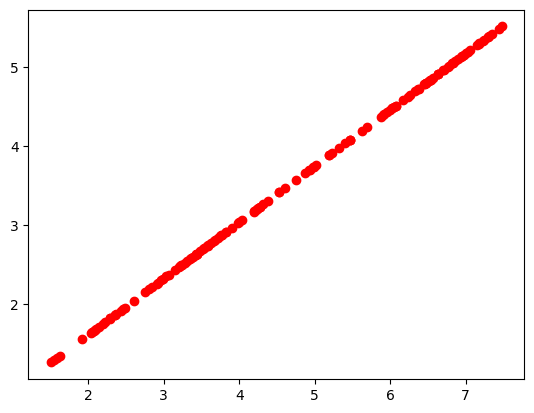

In [25]:
epochs = 1000
alfa = 0.001
b, w, loss = train(x_train, y_train, alfa, epochs)

print("Average error:", np.average(loss))

test(x_test, y_test, w, b)

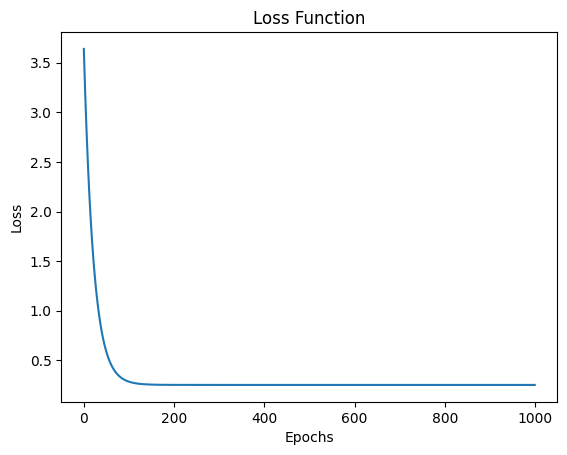

In [26]:
Plot_Loss(range(epochs), loss)

After Executing the Practice
If your model converges, do you notice that the error value fluctuates, going up and down? If so, what do you think could be causing this behavior?

Now, transform the values of X and Y to be within the range [0,1], that is, normalize the data using the following equation: v = (v - min) / (max - min), where v can be either x or y, depending on which variable you are normalizing. Then, run your code again.

If your code is correct, you should observe that the error function decreases more steadily. Why do you think this happens?

What is the average training error of your model?

What is the average testing error of your model?

Plot the evolution of the training error over time.

Train your model with different values of α {0.5, 0.1, 0.01, 0.001, 0.00001} and, after training, check the average error on the corresponding tests.

What happens when the value of α is close to 1, and what happens if it is very small?